In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dctn

In [33]:
M = 10
N = 5
img = np.random.normal(size=(M,N))

In [16]:
def neumann_grad(A):
    

    A_padded = np.pad(A, pad_width=1)
    vert_grad = A_padded[1:-1,1:-1] - A_padded[:-2,1:-1]
    horiz_grad = A_padded[1:-1,1:-1] - A_padded[1:-1,:-2]

    return vert_grad, horiz_grad

In [27]:
def neumann_grad_transpose(A1, A2):
    return (A1.T + A2.T).T

In [28]:
A.shape

(10, 5)

In [29]:
Rx1, Rx2 = neumann_grad(A)

In [30]:
Rx1.shape

(10, 5)

In [39]:
def apply_A(img):
    """Computes p^x and q^x as given above for an input image.
    """
    h_diffs, v_diffs = np.zeros_like(img), np.zeros_like(img)
    h_diffs[:,:-1] = img[:,:-1] - img[:,1:]
    v_diffs[:-1,:] = img[:-1,:] - img[1:,:]

    return h_diffs, v_diffs

def apply_A_T(p, q):
    """Computes A^T(p,q).
    """
    # Get m and n
    M, N = p.shape
    
    # Array for output
    result = np.zeros((M,N))

    # Pad arrays
    p = np.hstack([ np.zeros(M)[:,None], p])
    q = np.vstack([ np.zeros(N)[None,:], q])

    # # Pad p and q
    # p = np.pad(p, 1)
    # q = np.pad(q, 1)

    # Insert result
    result = p[:,1:] + q[1:,:] - p[:,:-1] - q[:-1, :] 

    return result

In [37]:
p, q = apply_A(img)


In [40]:
for j in range(10):
    x = np.random.normal(size=(M,N))
    y1, y2 = np.random.normal(size=(M,N)), np.random.normal(size=(M,N))
    Rx1, Rx2 = apply_A(x)
    Ry = apply_A_T(y1, y2)
    dot1 = (Rx1*y1 + Rx2*y2).flatten().sum()
    dot2 = (x * Ry).flatten().sum()
    print(f"dot1 = {dot1}")
    print(f"dot2 = {dot2}")
    print(f"")

dot1 = -0.05448996798513572
dot2 = 1.6911761026161396

dot1 = 5.02106965427462
dot2 = 4.761563089457912

dot1 = -14.155390783706578
dot2 = -16.09454628825142

dot1 = 5.4976115275911335
dot2 = -2.1148111826393405

dot1 = -2.401425500336643
dot2 = -3.381251607648112

dot1 = 4.432387061680465
dot2 = 3.9897352411066396

dot1 = -10.402385920862738
dot2 = -8.603506987053489

dot1 = 5.728667435326072
dot2 = 7.999279080511236

dot1 = -5.073089495950929
dot2 = -5.3498690699465365

dot1 = -16.234140794123636
dot2 = -15.944838209706976



In [ ]:
for j in range(1):
    v = 4 + np.random.normal(shape=A.shape)
    dctn(v, norm="ortho")


In [15]:
vert, horiz = neumann_grad(A)

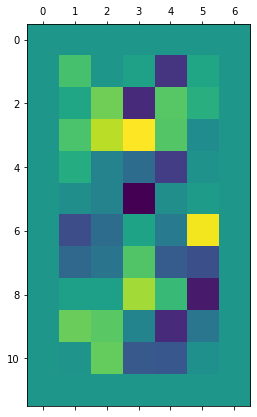

In [8]:
plt.matshow(np.pad(A, pad_width=1))

In [9]:
A_padded = np.pad(A, pad_width=1)

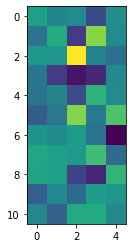

In [12]:
plt.imshow(A_padded[1:,1:-1] - A_padded[:-1,1:-1])

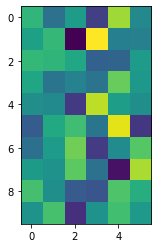

In [13]:
plt.imshow(A_padded[1:-1,1:] - A_padded[1:-1,:-1])